Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer 1: Anomaly Detection is the process of identifying data points or events that behave very differently from the normal pattern in a dataset. It is useful in many fields such as fraud detection, network security, health monitoring, and system fault detection.
    There are three main types of anomalies: Point anomalies, Contextual anomalies, and Collective anomalies.

Point anomalies occur when a single data point is far from the rest. For example, if most bank transactions are below ₹10,000 but one transaction is ₹5,00,000, that transaction is a point anomaly.

Contextual anomalies depend on the situation or context, such as time or location. For example, a temperature of 30°C is normal in summer but abnormal in winter.

Collective anomalies happen when a group of related data points together show abnormal behavior. For example, a sudden increase in network traffic may indicate a cyber attack.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Answer 2: Isolation Forest is an anomaly detection algorithm based on the idea of isolating anomalies rather than profiling normal data. It randomly splits data and isolates points that require fewer splits, which are considered anomalies. It works well for high-dimensional datasets and large volumes of data, such as fraud or system error detection.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) detects anomalies by finding dense regions of data points. Points that do not belong to any dense cluster are treated as outliers. It is best suited for spatial or geographical data where the data forms clusters of different shapes.

Local Outlier Factor (LOF) measures the local density of each data point and compares it to its neighbors. Points that have a much lower density than their neighbors are marked as anomalies. It works well when the data has varying densities and is often used in intrusion detection or sensor data analysis.

Question 3: What are the key components of a Time Series? Explain each with one example.

Answer 3: A Time Series is a sequence of data points recorded over time, and its key components help in understanding and forecasting patterns. The main components are Trend, Seasonality, Cyclic variation, and Irregular variation.

Trend shows the long-term movement or direction of data over time. For example, an increase in mobile phone users every year shows an upward trend.

Seasonality represents regular and repeating patterns that occur at fixed intervals, such as months or seasons. For example, ice cream sales increase every summer.

Cyclic variation refers to fluctuations that occur over long periods, often linked to economic or business cycles. For example, stock market ups and downs follow business cycles.

Irregular variation includes unexpected or random changes caused by unusual events. For example, a sudden drop in travel during a pandemic is an irregular variation.

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer 4: A stationary time series is one whose statistical properties like mean, variance, and covariance remain constant over time. In simple terms, it does not show trends or seasonal effects. Stationarity is important because most forecasting models, like ARIMA, work best on stationary data.

To test stationarity, methods like the Augmented Dickey-Fuller (ADF) test or visual inspection using plots can be used. If the series shows changing mean or variance, it is non-stationary.

To transform a non-stationary series into a stationary one, techniques like differencing (subtracting the previous value from the current), log transformation, or detrending are applied. These methods remove trends and stabilize the variance.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Answer 5: The AR (Auto-Regressive) model predicts future values based on past values of the series. It assumes that past observations influence future ones. For example, today’s temperature depends on previous days’ temperatures.

The MA (Moving Average) model uses past forecast errors (residuals) to predict future values. It focuses on the relationship between current values and previous error terms.

The ARIMA (Auto-Regressive Integrated Moving Average) model combines both AR and MA components and includes differencing to make a non-stationary series stationary. It is widely used for short-term forecasting of economic or sales data.

The SARIMA (Seasonal ARIMA) model extends ARIMA by adding seasonal terms to handle seasonality in data. For example, predicting monthly electricity demand with seasonal patterns.

The SARIMAX (Seasonal ARIMA with Exogenous Variables) model further includes external factors (exogenous variables) that may affect the target variable, such as including temperature or promotions while forecasting product sales.

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

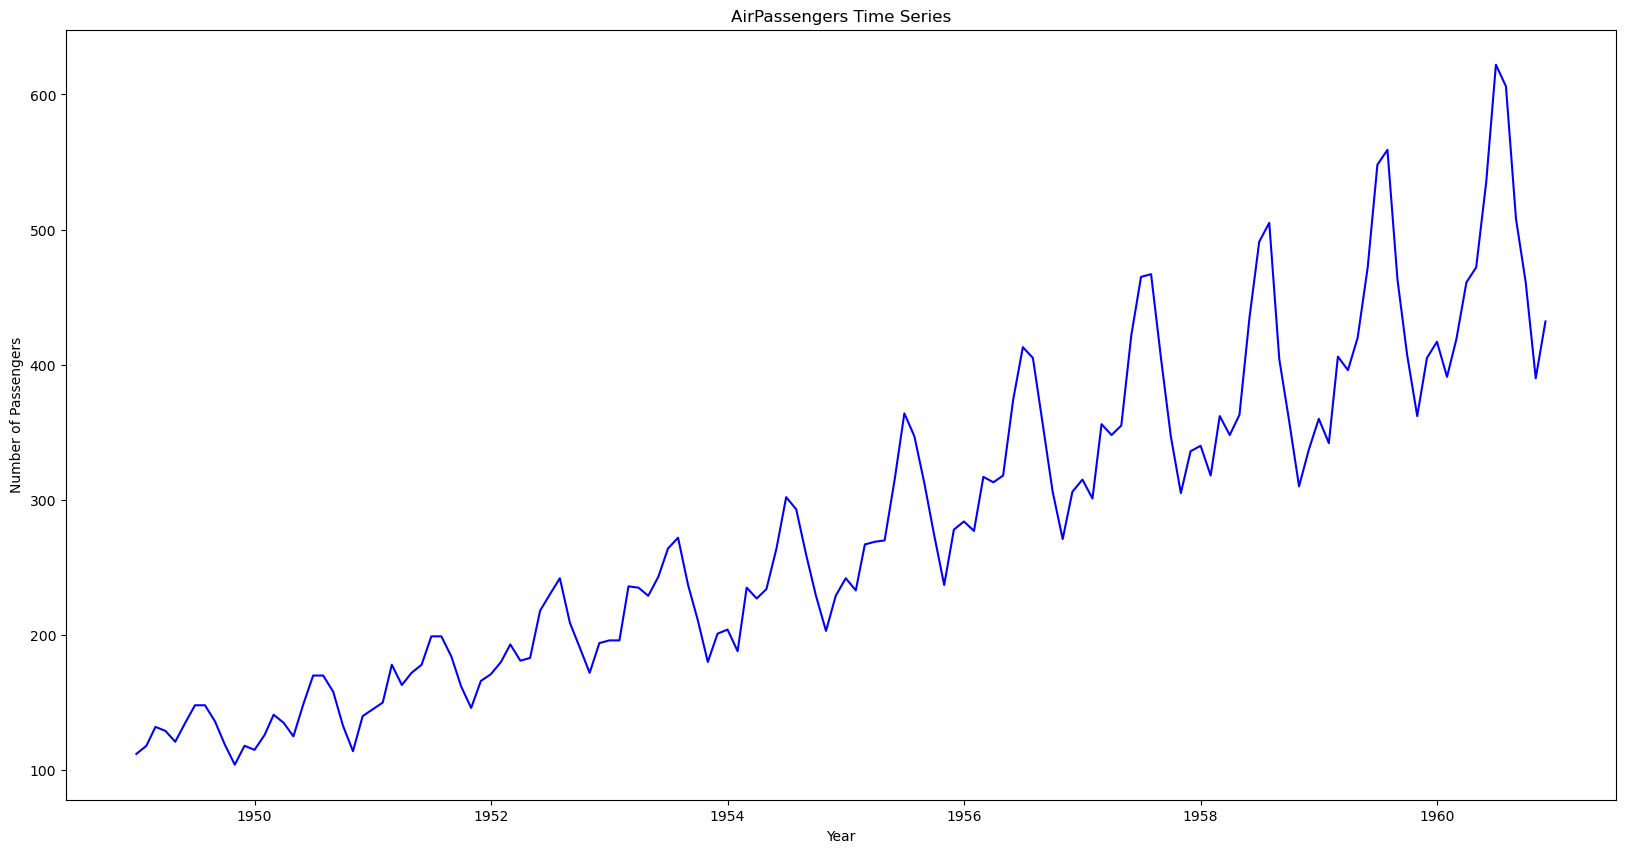

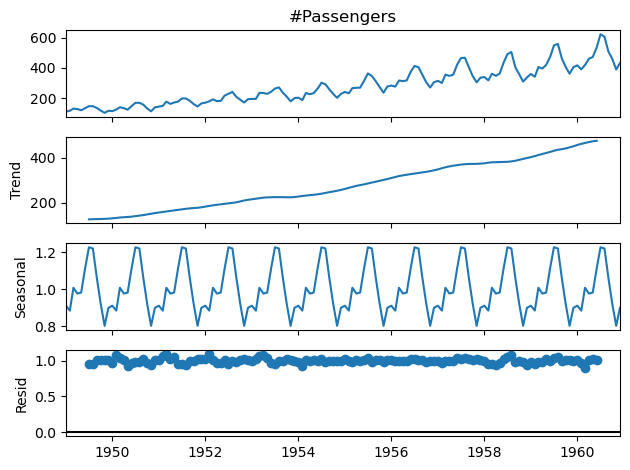

In [6]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset
data = pd.read_csv("AirPassengers.csv")

# Convert Month column to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the original time series
plt.figure(figsize=(20, 10))
plt.plot(data['#Passengers'], color='blue')
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')

# Plot the decomposed components
decomposition.plot()
plt.show()

The AirPassengers dataset contains monthly totals of airline passengers from 1949 to 1960. After plotting the series, we can see an upward trend showing the steady increase in air travel over time, seasonality representing repeating yearly peaks during certain months, and residuals showing random variations that cannot be explained by trend or seasonality. The decomposition helps us understand the structure of the time series and prepare it for forecasting models like ARIMA.

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

C:\Users\PC\AppData\Local\Temp\ipykernel_20284\2434367353.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NYC_taxi_fare_data.csv")
h:\datascience\Anaconda\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


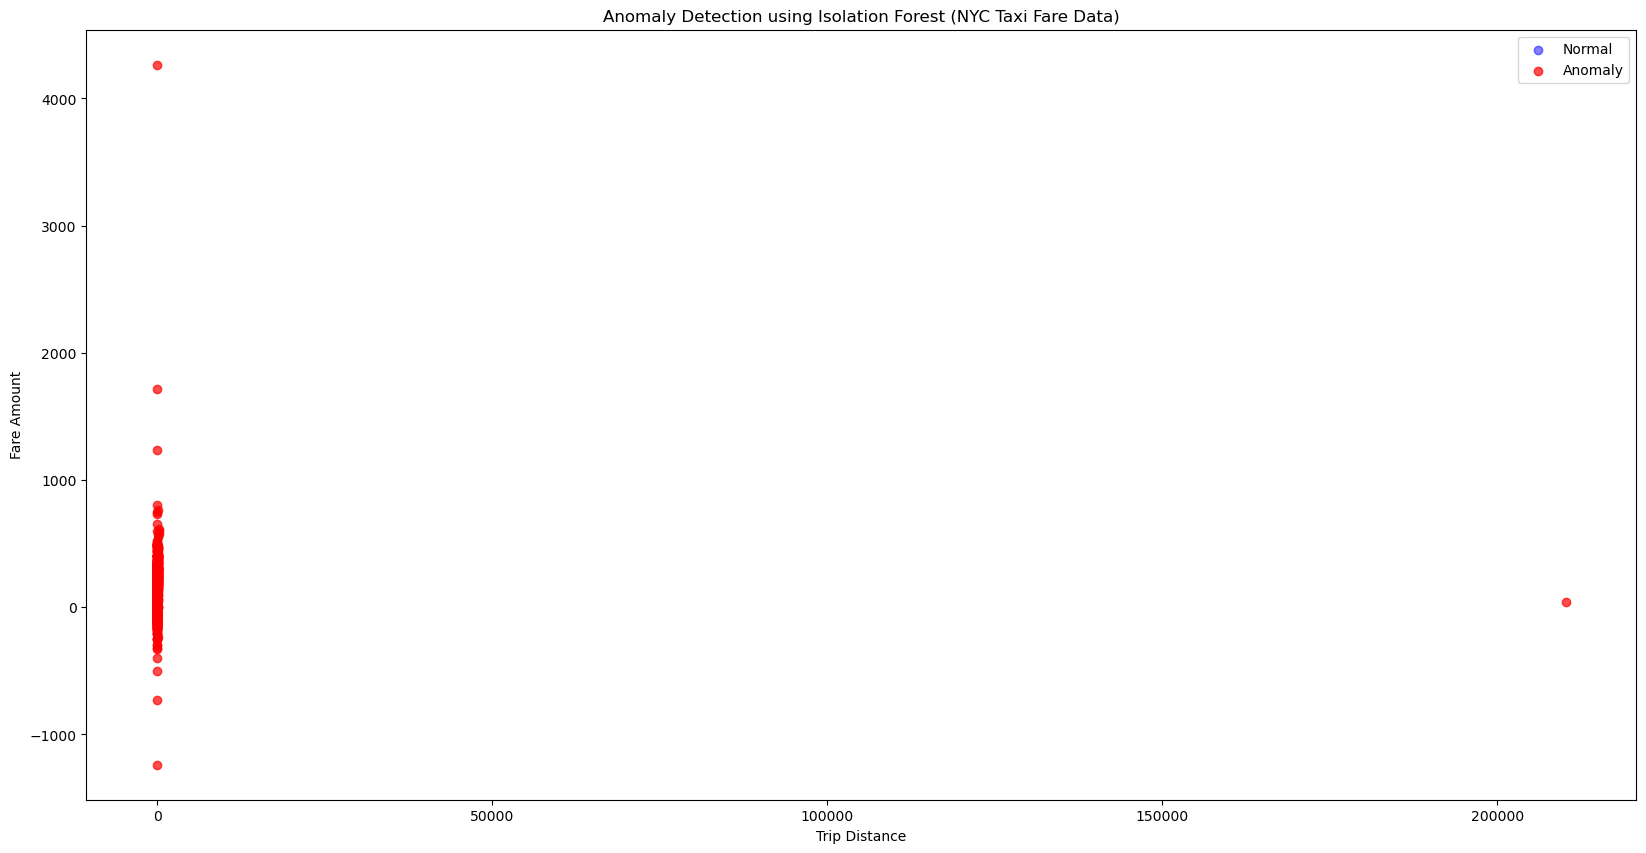

In [7]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the NYC Taxi Fare dataset
data = pd.read_csv("NYC_taxi_fare_data.csv")

# Select numerical columns for anomaly detection
df = data[['trip_distance', 'fare_amount', 'total_amount']].copy()

# Handle missing or invalid values
df = df.dropna()

# Apply Isolation Forest
model = IsolationForest(contamination=0.03, random_state=1)
df['anomaly'] = model.fit_predict(df)

# Mark anomalies (−1 = anomaly, 1 = normal)
outliers = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

# Visualize anomalies on a 2D scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(normal['trip_distance'], normal['fare_amount'], 
            color='blue', label='Normal', alpha=0.5)
plt.scatter(outliers['trip_distance'], outliers['fare_amount'], 
            color='red', label='Anomaly', alpha=0.7)
plt.title("Anomaly Detection using Isolation Forest (NYC Taxi Fare Data)")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend()
plt.show()

The Isolation Forest algorithm isolates anomalies by randomly splitting data points. In the NYC Taxi Fare dataset, trips with unusually high or low fares for a given distance are detected as anomalies. In the scatter plot, blue points represent normal rides, while red points show anomalous rides such as overcharged or undercharged fares. This helps identify unusual transactions or data errors efficiently.

Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

h:\datascience\Anaconda\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
h:\datascience\Anaconda\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


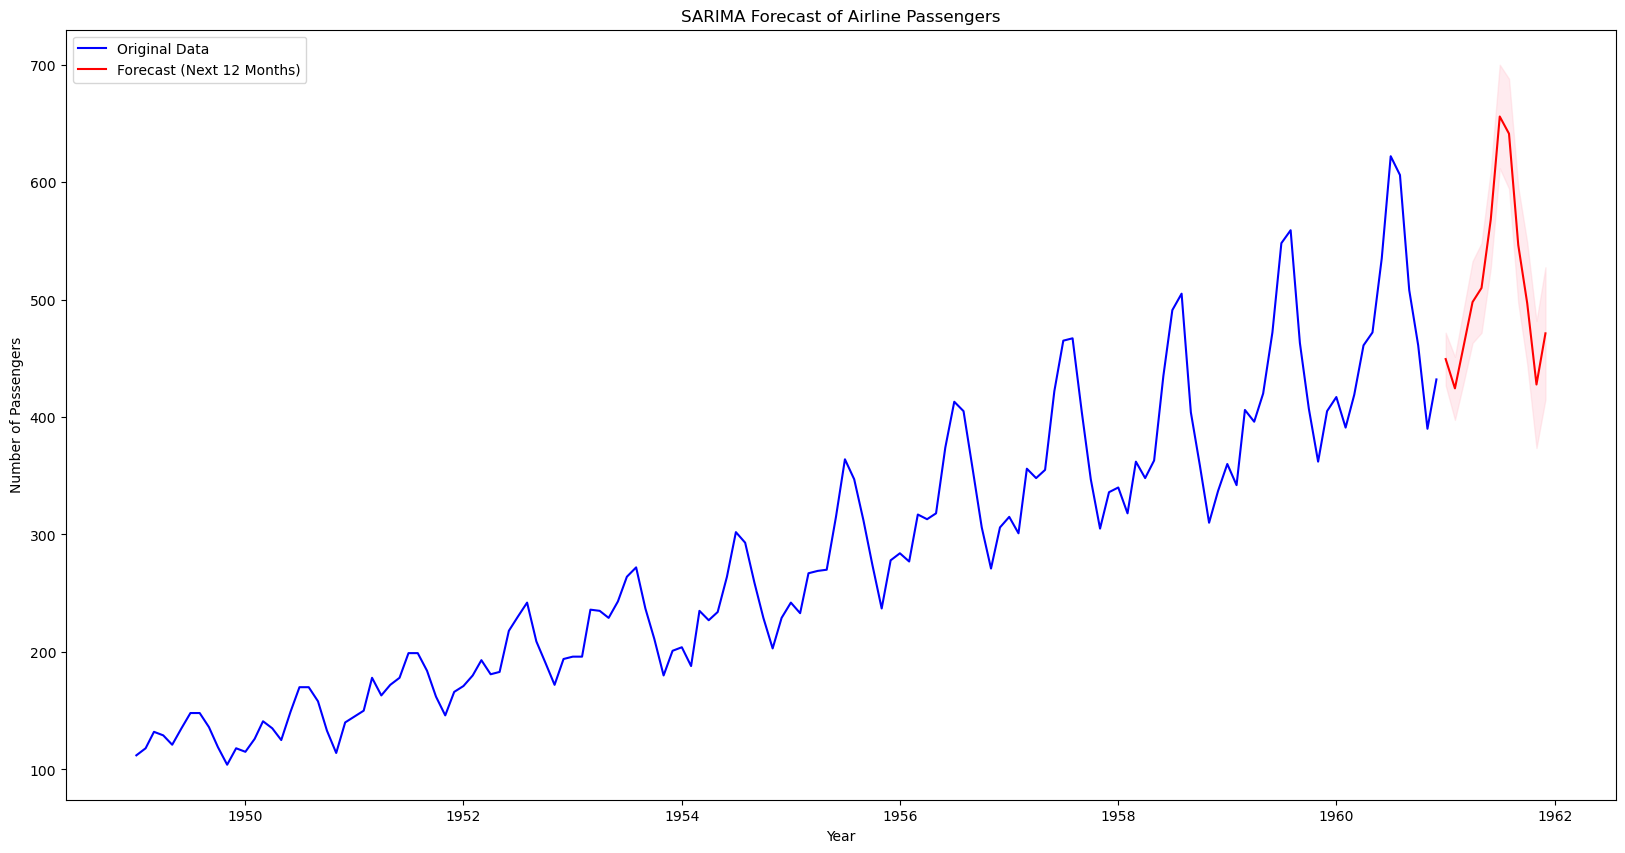

In [8]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the AirPassengers dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Fit the SARIMA model (p,d,q)(P,D,Q,12)
model = SARIMAX(data['#Passengers'], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot original series and forecast
plt.figure(figsize=(20,10))
plt.plot(data['#Passengers'], label='Original Data', color='blue')
plt.plot(forecast_values, label='Forecast (Next 12 Months)', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast of Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

The SARIMA model captures both trend and seasonal patterns in the AirPassengers dataset. After training, it forecasts the next 12 months of passenger numbers. The forecast shows a continued upward trend with clear seasonal peaks, matching the yearly travel pattern. The red line represents the forecasted values, while the shaded area shows the confidence interval for prediction uncertainty.

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

C:\Users\PC\AppData\Local\Temp\ipykernel_20284\2691181935.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NYC_taxi_fare_data.csv")
h:\datascience\Anaconda\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


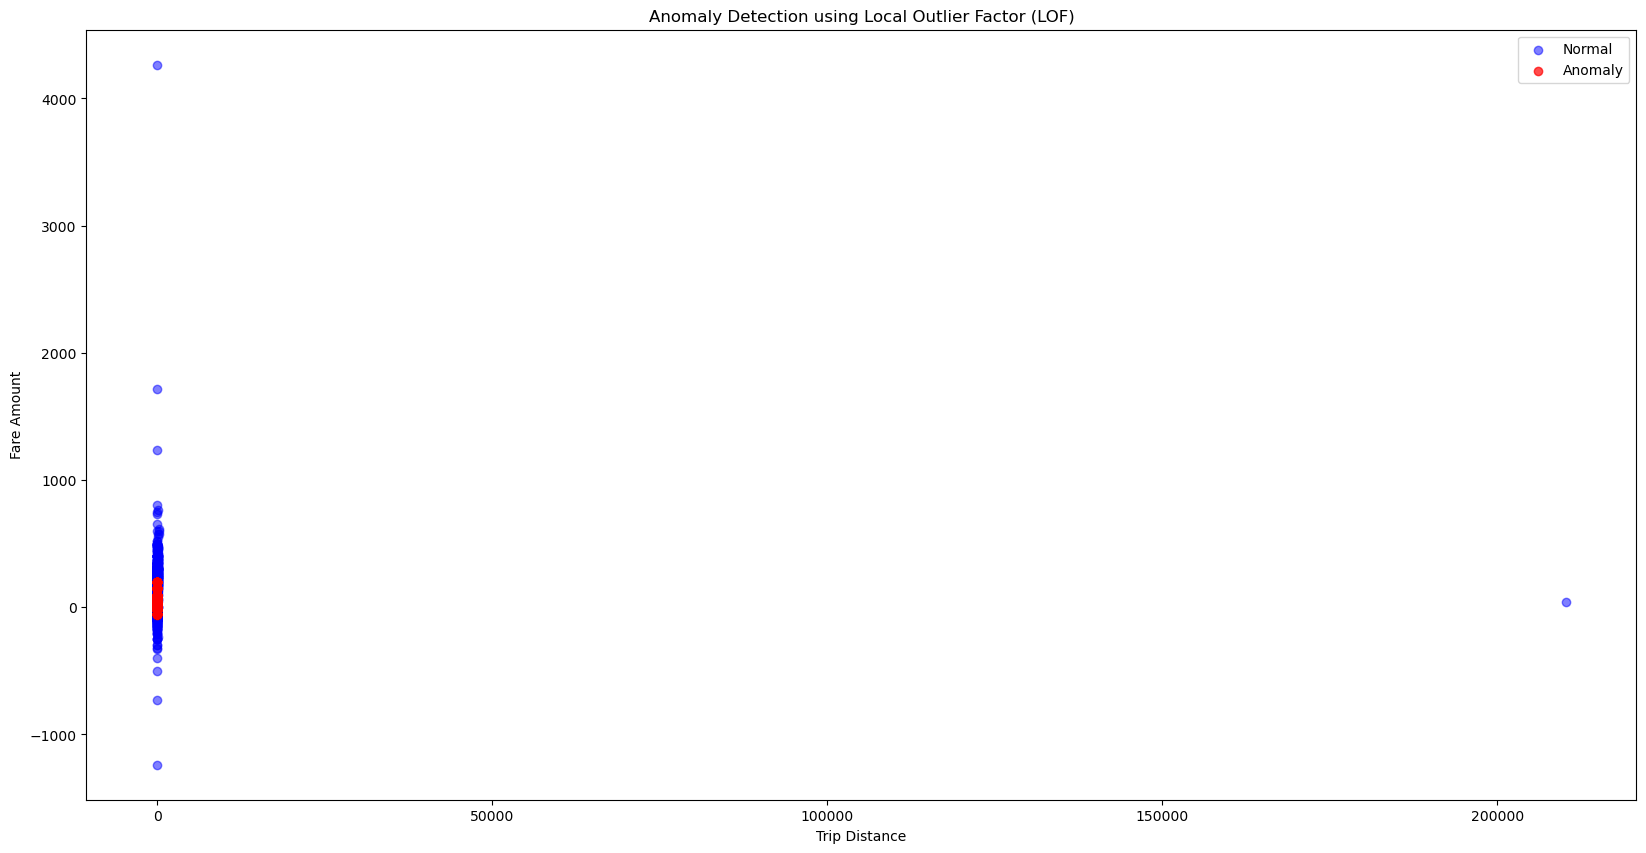

In [9]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the NYC Taxi Fare dataset
data = pd.read_csv("NYC_taxi_fare_data.csv")

# Select numerical columns for anomaly detection
df = data[['trip_distance', 'fare_amount', 'total_amount']].dropna()

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
df['anomaly'] = lof.fit_predict(df)

# Separate normal and anomalous points
normal = df[df['anomaly'] == 1]
outliers = df[df['anomaly'] == -1]

# Visualize results
plt.figure(figsize=(20, 10))
plt.scatter(normal['trip_distance'], normal['fare_amount'], 
            color='blue', label='Normal', alpha=0.5)
plt.scatter(outliers['trip_distance'], outliers['fare_amount'], 
            color='red', label='Anomaly', alpha=0.7)
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend()
plt.show()

The Local Outlier Factor (LOF) algorithm detects anomalies by comparing the local density of each point with its neighbors. Points with much lower density than their surrounding data are marked as anomalies. In the NYC Taxi Fare dataset, red points represent anomalous rides with unusually high or low fares for their trip distances, while blue points show normal rides. This method effectively identifies outliers in datasets with varying density.

Question 10: You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:
- How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
- Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
- How would you validate and monitor the performance over time?
- How would this solution help business decisions or operations?

Answer 10: To detect anomalies in real-time energy consumption data, I would use the Isolation Forest algorithm because it works well on large, streaming numerical data and can quickly flag sudden spikes or drops in energy usage. It isolates unusual readings based on how easily they differ from normal patterns, helping detect equipment failures or sudden demand surges.

For short-term forecasting, I would choose the SARIMAX model since it handles both seasonality and external factors like temperature or weather conditions. This helps forecast future energy demand more accurately using past consumption and environmental data.

To validate and monitor performance, I would use a sliding time window to retrain models periodically and evaluate predictions using metrics such as Mean Absolute Error (MAE) or Root Mean Square Error (RMSE). Continuous monitoring dashboards would track model drift and anomaly alerts in real time.

This solution would help the business by predicting demand peaks early, optimizing power distribution, preventing blackouts, and improving operational efficiency. It also supports better planning for energy production and resource management based on forecasted demand and detected anomalies.